# CIIC5015: Intro to Artificial Intelligence
### Example 3: Intro to PyTorch & Numpy - Using PyTorch to automatize models, compute loss/gradients
#### Import the necessary libraries
- PyTorch
- Numpy
- Matplotlib

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Generate Synthetic Data
This is done by using the `arange()` function that is included in PyTorch, we create an array of values from [-5, 5] with each new value having a step of 0.1. We then take and convert this into a N x 1 Tensor, where N in this case will be 100

In [3]:
"""
torch.arange(-5, 5, 0.1)
Return a 1D tensor that has values from -5, 5 with a step of 0.1 in between each value

.view(-1, 1)
Return a 2D tensor that has 1 column and compute the appropriate 
number of rows that is necessary to make this happen (we specify this with the -1). 
In this case, the appropriate number of rows is 100
"""
data = torch.arange(-5, 5, 0.1).view(-1, 1)
print(f"data.shape = {data.shape}")
print(f"data: {data}")

data.shape = torch.Size([100, 1])
data: tensor([[-5.0000e+00],
        [-4.9000e+00],
        [-4.8000e+00],
        [-4.7000e+00],
        [-4.6000e+00],
        [-4.5000e+00],
        [-4.4000e+00],
        [-4.3000e+00],
        [-4.2000e+00],
        [-4.1000e+00],
        [-4.0000e+00],
        [-3.9000e+00],
        [-3.8000e+00],
        [-3.7000e+00],
        [-3.6000e+00],
        [-3.5000e+00],
        [-3.4000e+00],
        [-3.3000e+00],
        [-3.2000e+00],
        [-3.1000e+00],
        [-3.0000e+00],
        [-2.9000e+00],
        [-2.8000e+00],
        [-2.7000e+00],
        [-2.6000e+00],
        [-2.5000e+00],
        [-2.4000e+00],
        [-2.3000e+00],
        [-2.2000e+00],
        [-2.1000e+00],
        [-2.0000e+00],
        [-1.9000e+00],
        [-1.8000e+00],
        [-1.7000e+00],
        [-1.6000e+00],
        [-1.5000e+00],
        [-1.4000e+00],
        [-1.3000e+00],
        [-1.2000e+00],
        [-1.1000e+00],
        [-1.0000e+00],
        [-9.0000e

### Real Value Function
Here, we define the function that represents our ideal model with `ideal_model`. Then, in a separate variable, we add fake noise to the model to simulate that the model made some predictions on its own.

In [4]:
ideal_model = -5 * data
predictions = ideal_model + 0.4 * torch.rand(data.size()) # Add fake noise to every value of X using torch.rand()

### Matplotlib Graph
Now, to take a look at our model and data it "predicted" we use Matplotlib to graph everything.

In [5]:
print(f"data.shape: {data.shape}")
print(f"predictions.shape: {predictions.shape}")

data.shape: torch.Size([100, 1])
predictions.shape: torch.Size([100, 1])


First, we convert the data, the model and the predictions to Numpy arrays so we can plot them. Then we tell Matplotlib to take those arrays and plot them in their correspoding axis.

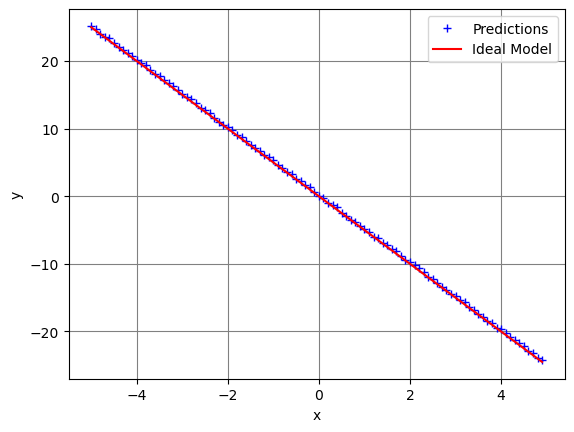

In [6]:
# Convert torch arrays to numpy arrays and plot it
plt.plot(data.numpy(), predictions.numpy(), 'b+', label="Predictions") # (Given Data) Shown as + symbols
plt.plot(data.numpy(), ideal_model.numpy(), 'r', label="Ideal Model") # (Ideal Model)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, color='grey')
plt.show()


### Weight & Bias
Now, we define a class that will hold our model to train, this will be the `RegressionModel` class that inherits from `torch.nn.Module`. Said class will hold a field called `linear_model` which is an instance of PyTorch's Linear Regression model. We pass it as a parameter a number of input and output dimensions and pyTorch takes care of the rest.

Our predictions will be of the following form: $$Y = wX + b - model$$

We also define the following method inside the class:
- `forward(data: Tensor) -> Tensor`
    - Returns the model modified by applying a linear transformation to the data passed as parameter

Finally, we declare two new variables:
- `optimizer`
    - Uses PyTorch's Stochastic Gradient Descent algorithm to update the paramteter values based on the computes loss
- `criterion` 
    - Returns the mean square error of the prediction the model made against its actual value using an instance of PyTorch's `MSELoss` class

In [7]:
class RegressionModel(torch.nn.Module):

    def __init__(self, input_dim, output_dim):
        super(RegressionModel, self).__init__()
        self.linear_model = torch.nn.Linear(input_dim, output_dim, bias=True)

    def forward(self, x):
        out = self.linear_model(x)
        return out
    
input_dim = 1
output_dim = 1

model = RegressionModel(input_dim, output_dim)
criterion = torch.nn.MSELoss() # Mean Squared Error Loss Function

# Parameter Optimizer Based on Loss
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), learning_rate) # Stochastic Gradient Descent

### Create the hyperparameters to train model
Here, we define three hyperparameters we will tinker manually to adjust the model training:
- `epochs`: The number of iterations we will make to train the model
- `loss_list`: A Python list to store previously compute loss values. This is to see how the loss changes as training is done on the model. It is expected that all the values in this list converge to 0 as N approaches the number of epochs specified.

In [8]:
epochs = 20
loss_list = [] # Store computed loss values per epoch

### Standard Training Loop
Here, we create the main loop to train our model. The algorithm to train is as follows:
```
for i = 0 to number of epochs:
    cur_prediction: make a prediction using the data stored
    computed_loss: Compute the mean square error of the prediction against its real value
    Add computed_Loss value to the loss_list
    Update the values and parameters of the computed loss
    Do Gradient Descent to update the weight value & reset the graident to 0 for the next iteration
    Output values computed in ith iteration
```

In [13]:
for _ in range(epochs):
    # Reset all gradients to 0
    optimizer.zero_grad()

    # Make a prediction using data stored in X
    cur_prediction = model.forward(data)

    # Compute loss from prediction (cur_prediction) and actual value (ideal_model)
    loss = criterion(cur_prediction, ideal_model)

    # Store computed loss value
    loss_list.append(loss.item())

    # Propagte computed error, the whole graph is differentiated with respect to the loss
    loss.backward()

    # Update weight & bias
    optimizer.step()

print("Finished Training!")

Finished Training!


### Plot computed loss values
This is to see what happened during training & see how long it took the loss to converge to 0

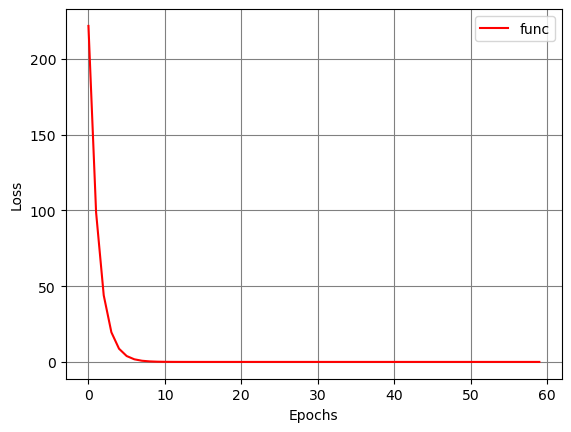

In [14]:
plt.plot(loss_list, 'r', label="func") # Plot the loss function in red color
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, color='grey')
plt.show()